# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (17)

**23/01/2023**

## Clasificación de imágenes con redes neuronales convolucionales

![image.png](attachment:image.png)

Las **[redes neuronales convolucionales (CNN) o _ConvNet_](https://es.wikipedia.org/wiki/Red_neuronal_convolucional)** son una variación de redes neuronales profundas (DNN) o perceptrón multicapa (MLP) que **se aplican sobre las matrices bidimensionales como imágenes**. Estas redes consisten en **múltiples capas de filtros convolucionales que procesan la información en una manera muy parecida al cortex visual del ojo humano**, por lo tanto son muy efectivas para tareas de **visión artificial**, clasificación y segmentación de imágenes, entre otras aplicaciones.

En otro tipo de problemas de clasificación, **siempre se procesan los datos para llegar a determinar las variables o los _features_** que caracterizan a una observación. En caso de _visión artificial_, donde cada observación es una imágen, también debemos llegar a **definir un conjunto preferiblemente reducido de características** para después desarrollar un clasificador basado en esos aspectos. 

Por este motivo, al **principio** de una red neuronal convolucional se encuentra **la fase de extracción de _features_** o características, donde **al igual que el proceso estimulante en las células del cortex visual**, se forman los atributos más importantes y **se disminuye la dimensionalidad** mediante la aplicación de **varias capas convolucionales y de reducción de muestreo**.

Después, se encuentran neuronas de perceptrón sencillas en una **estructura densa (_fully-connected_)** que realizan la **clasificación final** sobre las características extraídas.



![image.png](attachment:image.png)

### Procesado convolucional

Sabemos que los imágenes no son más que grupos de píxeles juntos. Una **imagen RGB** no es más que una **matriz de valores de píxeles** que tiene **tres nivels de información**, mientras que una imagen en **escala de grises** se representa con una matriz en **un plano**. 

![image.png](attachment:image.png)

Una técnica común consiste en **normalizar estos valores** antes de proceder a entrenar el modelo de la red neuronal. 

![image.png](attachment:image.png)

La **convolución** consiste en **extraer localmente las características** y los patrones específicos de los objetos presentes en una imagen. Para ello se consideran **grupos de pixeles adyacentes** de la imagen para sacar el producto escalar (convolución) contra un pequeño filtro o mejor dicho una matriz llamada **`kernel`**.


![Conv_no_padding_strides.gif](attachment:Conv_no_padding_strides.gif)

Ese **filtro** o kernel (por ejemplo de tamaño 3×3 pixels) **recorre toda la imagen** generalmente de izquierda a derecha y de arriba hasta abajo, para obtener la función convolucionada. La matriz resultante se pasa a la siguiente capa.

![11178fil.gif](attachment:11178fil.gif)

Paras las imágenes en **color (RGB)** sea aplicarán en realidad **3 kernels diferentes** (por ejemplo de 3×3) a cada canal. Después, se **suman los resultados** también con un valor de **sesgo (_bias_)** para obtener una única salida al igual que el caso de un solo canal.

![1_ciDgQEjViWLnCbmX-EeSrA.gif](attachment:1_ciDgQEjViWLnCbmX-EeSrA.gif)

A la matriz convolucionada se le aplica una **función de activación** para añadir la **no-linealidad** al igaul que en otros tipos de redes neuronales. La función más utilizada es ___Relu___, donde se filtran todos los píxeles con valores negativos.

![image.png](attachment:image.png)

En realidad, **no sólo se utiliza un _kernel_**, si no que se aplican varios kernels como un conjunto de **filtros**. Por lo tanto tendremos **varias matrices de salida** que en su conjunto se conocen como **`feature mapping`**. 

La **primera convolución** permite a la red que detecte **características básicas**, generalmente como lineas o curvas. Conforme se aumenta el número de capas ocultas convolucionales, los mapas de características reconocen aspectos y patrones más complejos.

Al terminar la fase convolucional, cuando se dispone de un conjunto de características o un _fearture mapping_ que representa los rasgos y los atributos más identificativos de los objetos que se deben reconocer, pasamos a **la fase de clasificación** como otros tipos de rdes neuronales, **aplanando el conjunto final de los _features_** mediante una capa llamada **`flatten layer`** que nos permite desarrollar una **red neuronal con capas densas (_fully-connected_)** apartir de ese conjunto de características extraídas.    

![image.png](attachment:image.png)

Al final de la estructura definida y montada de la red neuronal convolucional, necesitamos que **la capa final tenga los nodos suficientes** para que el modelo acabe clasificando los objetos reconocidos según el número de categorías o clases existentes en el dataset. Este paso se suele aplicar mediante la función **`softmax`** que es equivalente a **`sigmoid`** pero asigna probabilidades (valores entre 0 y 1) a cada clase para un problema de **clasificación multi-clase**. 

![image.png](attachment:image.png)

### Ejemplo de reconocimiento de numeros manuscritos (MNIST)

Vamos a realizar un ejercicio para desarrollar un clasificador que **sea capaz de recibir una imágen de un número escrito a mano y decidir a qué dígito corresponde**. El dataset **[MNIST](http://yann.lecun.com/exdb/mnist/)** contiene una serie de imágenes de números manuscritos. Por defecto al cargarse mediante librería _keras_, se dispone de un conjunto de datos de **60.000 imágenes** en **escala de grises** como conjunto de **entrenamiento** de tamaño **28x28** píxeles para los **10 dígitos**, además de un conjunto de **prueba** de **10.000 imágenes**.

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datos (imágenes)

In [3]:
# Cargar el dataset desde la librería keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Consultar los registros del DataFrame
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
print("El tipo de datos de entrada (training): ", type(X_train))
print("La dimensión de datos de entrada (training):", X_train.ndim)
print("El tamaño de datos de entrada (training):", X_train.shape)

El tipo de datos de entrada (training):  <class 'numpy.ndarray'>
La dimensión de datos de entrada (training): 3
El tamaño de datos de entrada (training): (60000, 28, 28)


In [6]:
print("El tipo de datos de entrada (test): ", type(X_test))
print("La dimensión de datos de entrada (test):", X_test.ndim)
print("El tamaño de datos de entrada (test):", X_test.shape)

El tipo de datos de entrada (test):  <class 'numpy.ndarray'>
La dimensión de datos de entrada (test): 3
El tamaño de datos de entrada (test): (10000, 28, 28)


Las imágenes son 28x28 = 784 píxeles en escala de grises (negro y blanco)

In [7]:
# La segunda imágen del conjunto de entrenamiento
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Podemos utilizar el método `imshow` de _matplotly_ para hacer una visualización rápida y comparar la imágen con su valor asociado en las etiquetas de salida:

La etiqueta asociada a este dígito es:  0


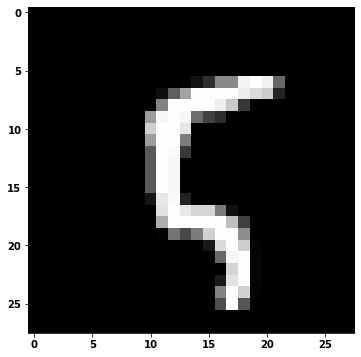

In [8]:
plt.imshow(X_train[100], cmap='gray')
print("La etiqueta asociada a este dígito es: ", y_train[1])

Cada carácter ocupa un "_byte_" que se forma por ocho "_bits_": **$2^8=256$** El valor de cada píxel varía de _0_ a _255_.  
El tipo __uint8__ en _numpy_ significa: `Unsigned integer (0 to 255)`

In [9]:
print(X_train.dtype)
print(X_train.min())
print(X_train.max())

uint8
0
255


Las salidas del modelo serían los dígitos asociados a cada imágen:

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
print("El tipo de datos de salida (training): ", type(y_train))
print("La dimensión de datos de salida (training):", y_train.ndim)
print("El tamaño de datos de salida (training):", y_train.shape)

El tipo de datos de salida (training):  <class 'numpy.ndarray'>
La dimensión de datos de salida (training): 1
El tamaño de datos de salida (training): (60000,)


Consultamos las **frecuencias de los dígitos**. Es muy importante que el modelo se entrene con un **conjunto equilibrado** de datos que idealmente tenga una **representación igual** para cada clase.

<AxesSubplot:>

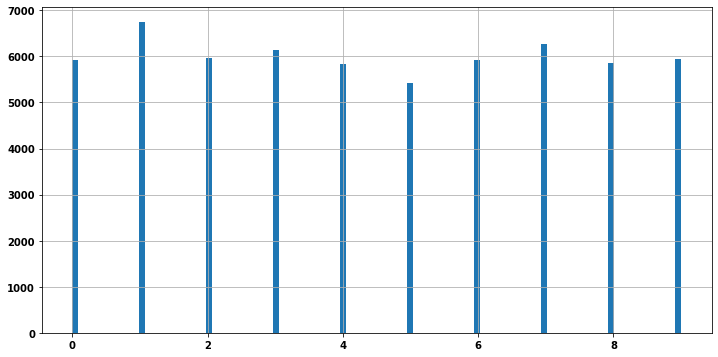

In [12]:
# El histograma de los dígitos presentes en el dataset
pd.Series(y_train).hist(bins=100)

Para que los datos utilizados en la creación del modelo tengan **una escala estándar**, procedemos primero a **normalizar los datos de entrada** de esta manera:


In [13]:
# Vamos a escalar los valores de nuestras arrays para que se convierten en valores entre 0 y 1
X_train_norm = X_train / 255
X_test_norm = X_test / 255


In [14]:
# Valores normalizados
pd.Series(X_train_norm.flatten()).unique()

array([0.        , 0.01176471, 0.07058824, 0.49411765, 0.53333333,
       0.68627451, 0.10196078, 0.65098039, 1.        , 0.96862745,
       0.49803922, 0.11764706, 0.14117647, 0.36862745, 0.60392157,
       0.66666667, 0.99215686, 0.88235294, 0.6745098 , 0.94901961,
       0.76470588, 0.25098039, 0.19215686, 0.93333333, 0.98431373,
       0.36470588, 0.32156863, 0.21960784, 0.15294118, 0.85882353,
       0.77647059, 0.71372549, 0.94509804, 0.31372549, 0.61176471,
       0.41960784, 0.80392157, 0.04313725, 0.16862745, 0.05490196,
       0.00392157, 0.35294118, 0.54509804, 0.74509804, 0.00784314,
       0.2745098 , 0.1372549 , 0.62745098, 0.42352941, 0.31764706,
       0.94117647, 0.46666667, 0.09803922, 0.17647059, 0.72941176,
       0.58823529, 0.10588235, 0.0627451 , 0.98823529, 0.73333333,
       0.97647059, 0.18039216, 0.50980392, 0.71764706, 0.81176471,
       0.58039216, 0.89803922, 0.98039216, 0.09411765, 0.44705882,
       0.86666667, 0.78823529, 0.30588235, 0.09019608, 0.25882

Ahora tenemos que tratar la salida que son dígitos de 0 a 9

In [15]:
pd.Series(y_train).unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

Debemos **estandarizar** también estos valores para la **variable objetivo**. Sin embargo, no queremos que tomen valores tipo `float` con decimales, porque **la salida de nuestra red sería una probabilidad para cada dígito o cada clase**. tenemos que construir nuestra red neuronal con **10 neuronas en la capa de salida**.  

El algoritmo no puede comparar un vector de 10 valores con un solo valor objetivo. Para ello, **convertimos cada valor objetivo en un vector de longitud 10**, usando la técnica de `One-hot encoding`:

- El valor `0` de la variable objetivo se convierte en `[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]`  
- El valor `1` de la variable objetivo se convierte en `[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]`  
- El valor `2` de la variable objetivo se convierte en `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`  
- ...
- El valor `9` de la variable objetivo se convierte en `[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]`  

In [16]:
# La codificación one-hot se puede realizar fácilmente con las utilidades proporcionadas por Keras
from keras.utils import to_categorical

to_categorical(y_train, dtype='uint8')[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
# La codificación one-hot se puede realizar fácilmente con las utilidades proporcionadas por Keras
from keras.utils import to_categorical

y_train_norm = to_categorical(y_train, dtype='uint8')
y_test_norm = to_categorical(y_test, dtype='uint8')

print("Etiqueta de la segunda imágen: ", y_train[1])
print("Etiqueta normalizada de la segunda imágen: ", y_train_norm[1])

Etiqueta de la segunda imágen:  0
Etiqueta normalizada de la segunda imágen:  [1 0 0 0 0 0 0 0 0 0]


Ahora necesitamos **redimensionar los conjuntos de datos de entrada (X_train y X_test)** a la forma que espera nuestra red de las imágenes.
- El **primer** número es el **número de imágenes** (60.000 para X_train y 10.000 para X_test).  
- Después viene la forma de **cada imagen (28x28)**.  
- El último número habla de **la escala de los valores de cada píxel**. En este caso sería 1, lo que significa que las imágenes están en **escala gris** (negro y blanco).

In [18]:
# Vamos a redimensionar los datos normalizados de entrada
x_train = X_train_norm.reshape(len(X_train_norm),28,28,1)
x_test = X_test_norm.reshape(len(X_test_norm),28,28,1)

print("El tamaño de datos de entrada (training):", x_train.shape)
print("El tamaño de datos de entrada (test):", x_test.shape)

print("El tamaño de entrada a la red:", x_train[0].shape)

El tamaño de datos de entrada (training): (60000, 28, 28, 1)
El tamaño de datos de entrada (test): (10000, 28, 28, 1)
El tamaño de entrada a la red: (28, 28, 1)


Antes de desarrollar una **red neuronal convolucional (CNN)**, intentamos crear una **red neuronal profunda (DNN)** sin la fase de convolución y con las capas densas utilizadas en otros problemas distintos que reconocimiento de imágenes.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 119,810
Trainable params: 119,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
60/60 [==============================] -

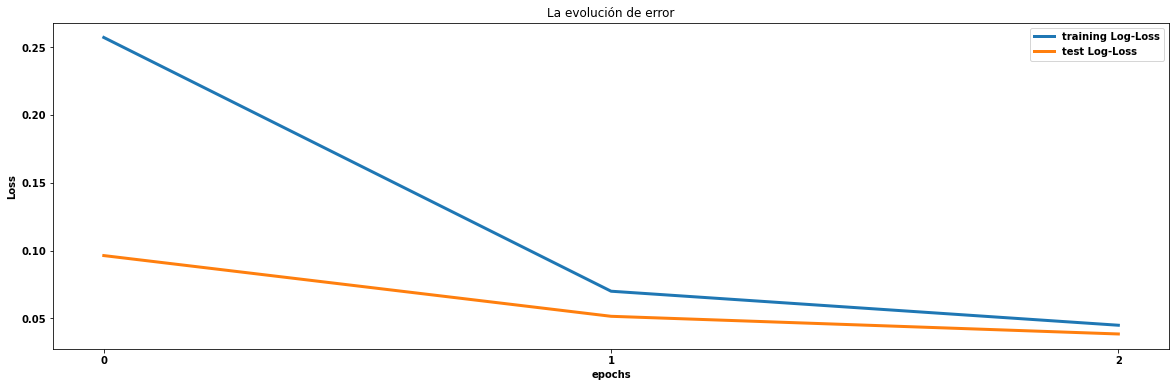

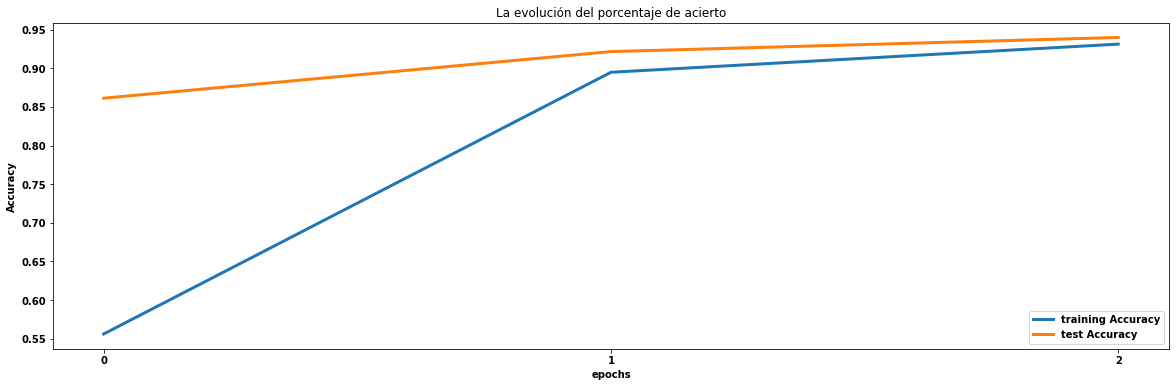

In [19]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 333
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`


# Declarar el modelo que se va a crear
modelo_dnn = Sequential()

# Definir la entrada a la red que son imágenes (28,28,1)
modelo_dnn.add(Input(shape=x_train[0].shape))

# Debemos aplanar la matriz de cada imágen para pasarlos a las capas densas (fully-connected) 
modelo_dnn.add(Flatten())

# Definir las capas ocultas
modelo_dnn.add(Dense(100, activation='relu'))
modelo_dnn.add(Dense(200, activation='relu'))
modelo_dnn.add(Dense(100, activation='relu'))

# La capa de salida con el tamaño de la respuesta
modelo_dnn.add(Dense(10, activation='softmax'))

# Compilar e indicar los ajustes del modelo
modelo_dnn.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Consultar el resumen del modelo definido
modelo_dnn.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_dnn.fit(x_train, y_train_norm, validation_data=(x_test, y_test_norm), epochs=3, batch_size=1000)

# Calcular las predicciones para el conjunto de test 
y_pred_dnn = modelo_dnn.predict(x_test)


# Filtrar las predicciones y evaluar el modelo
y_pred_dnn_filt = np.where(y_pred_dnn < 0.5, 0, 1)
print('Acuuracy:', accuracy_score(y_test_norm, y_pred_dnn_filt))
print('AUC:', roc_auc_score(y_test_norm, y_pred_dnn_filt))

# Graficamos la evolución de error (Logic Loss)
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.plot(registros.epoch, registros.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

# Graficamos la evolución del porcentaje de acierto (Accuracy)
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
plt.plot(registros.epoch, registros.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

Como se puede ver los resultados son bastante aceptables, como se puede ver el rendimiento para diferentes clases detectadas.

In [20]:
print(classification_report(y_test_norm, y_pred_dnn_filt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.93      0.92      0.92      1010
           4       0.93      0.95      0.94       982
           5       0.94      0.91      0.92       892
           6       0.95      0.95      0.95       958
           7       0.96      0.93      0.94      1028
           8       0.93      0.90      0.92       974
           9       0.93      0.92      0.92      1009

   micro avg       0.95      0.94      0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000
 samples avg       0.94      0.94      0.94     10000



/home/alberto/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ahora creamos una red neuronal con **capas convolucionales**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 10)        170       
                                                                 
 flatten (Flatten)           (None, 6250)              0         
                                                                 
 dense (Dense)               (None, 50)                312550    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 313,230
Trainable params: 313,230
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
60/60 [==============================] - 16s 236ms/step - loss: 0.2285 - accuracy: 0.6595 - val_loss: 0.0832 - val_accuracy: 0.8961
Epoch 2/3
60/60 [=======================

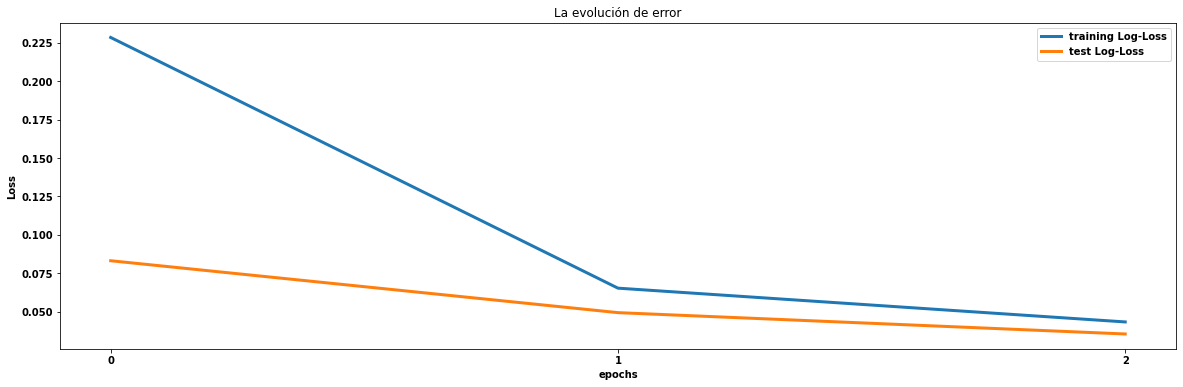

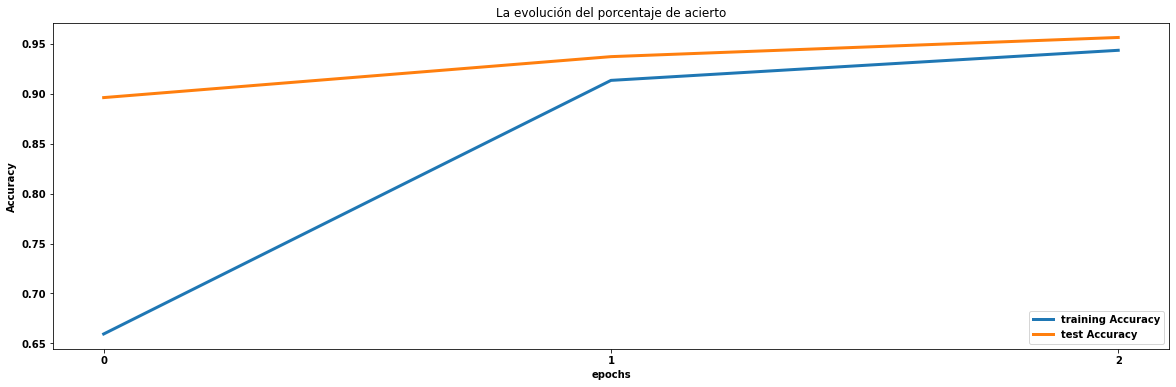

In [21]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 333
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`


# Declarar el modelo que se va a crear
modelo_cnn = Sequential()
modelo_cnn.add(Input(shape=x_train[0].shape))
modelo_cnn.add(Conv2D(filters=10, kernel_size=(4,4), activation='relu'))
modelo_cnn.add(Flatten())
modelo_cnn.add(Dense(50, activation='relu'))
modelo_cnn.add(Dense(10, activation='softmax'))

# Compilar e indicar los ajustes del modelo
modelo_cnn.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Consultar el resumen del modelo definido
modelo_cnn.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros = modelo_cnn.fit(x_train, y_train_norm, validation_data=(x_test, y_test_norm), epochs=3, batch_size=1000)

# Calcular las predicciones para el conjunto de test 
y_pred_cnn = modelo_cnn.predict(x_test)


# Filtrar las predicciones y evaluar el modelo
y_pred_cnn_filt = np.where(y_pred_cnn < 0.5, 0, 1)
print('Acuuracy:', accuracy_score(y_test_norm, y_pred_cnn_filt))
print('AUC:', roc_auc_score(y_test_norm, y_pred_cnn_filt))

# Graficamos la evolución de error (Logic Loss)
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
plt.plot(registros.epoch, registros.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

# Graficamos la evolución del porcentaje de acierto (Accuracy)
plt.figure(figsize=(20,6))
plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
plt.plot(registros.epoch, registros.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.xticks(registros.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

Primero echamos un vistazo a los parámetros o mejor dicho **los pesos de la red** 

In [22]:
modelo_cnn.weights

[<tf.Variable 'conv2d/kernel:0' shape=(4, 4, 1, 10) dtype=float32, numpy=
 array([[[[ 0.2684368 , -0.04390166,  0.01720692,  0.19965388,
           -0.10211267, -0.09183601,  0.08057078, -0.06403024,
            0.09350482,  0.00411319]],
 
         [[ 0.00803829, -0.05401225,  0.2811248 , -0.05687389,
           -0.11774383,  0.14887206,  0.20003463,  0.13053094,
           -0.04900989,  0.02424035]],
 
         [[-0.08188203,  0.05385396,  0.05209389, -0.00709304,
           -0.05083134, -0.0957577 ,  0.01754453, -0.03108688,
            0.01672015,  0.02962081]],
 
         [[-0.15780196, -0.1454722 ,  0.2782023 , -0.04781014,
           -0.01911161, -0.1076639 , -0.02518135, -0.12941764,
           -0.11262275, -0.1546882 ]]],
 
 
        [[[ 0.02170249,  0.09788498,  0.07757497,  0.16314791,
           -0.22778401,  0.15065023,  0.17399   , -0.04665212,
            0.01813672,  0.20191653]],
 
         [[ 0.1477632 ,  0.17081097, -0.07002556,  0.14383283,
           -0.15881675, -

In [23]:
# Consultamos las etiquetas normalizadas del conjunto de test
y_test_norm

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [24]:
# Consultamos las predicciones filtradas del modelo para el conjunto de test
y_pred_cnn_filt

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
# Consultamos la salida cruda del modelo para el conjunto de test
y_pred_cnn

array([[2.3806876e-06, 3.6978353e-08, 1.2578990e-05, ..., 9.9992651e-01,
        3.0575251e-08, 1.4040367e-06],
       [1.4108799e-05, 2.3730349e-06, 9.9958402e-01, ..., 1.4883972e-10,
        6.2431076e-07, 2.3859395e-10],
       [5.7495890e-06, 9.9894696e-01, 2.5826340e-04, ..., 3.9830647e-04,
        5.3305219e-05, 2.6744054e-05],
       ...,
       [1.4957285e-08, 3.6655453e-07, 2.2207396e-07, ..., 8.4501822e-05,
        1.8138543e-04, 5.5459095e-04],
       [2.2766275e-05, 2.4617445e-06, 3.9995189e-06, ..., 8.6155814e-07,
        2.1590376e-02, 4.8841980e-06],
       [7.2143969e-08, 1.2593937e-10, 9.7643560e-06, ..., 3.3424055e-11,
        3.1249778e-09, 2.2222053e-09]], dtype=float32)

Vamos a investigar la distribución y el rango de **la salida directa de la red** que serían las **probabilidades** de que si pertenece una imágen a una clase o no.

In [26]:
# Las características estadística de las predicciones sin filtrar
pd.Series(y_pred_cnn.flatten()).describe().round(5)

count    100000.00000
mean          0.09999
std           0.29068
min           0.00000
25%           0.00000
50%           0.00002
75%           0.00043
max           1.00000
dtype: float64

Por ser valores **muy concentrados cerca de 0 y de 1**, no hay ninguna preocupación a la hora de determinar el **umbral** final para el filtro de las predicciones.  

<AxesSubplot:>

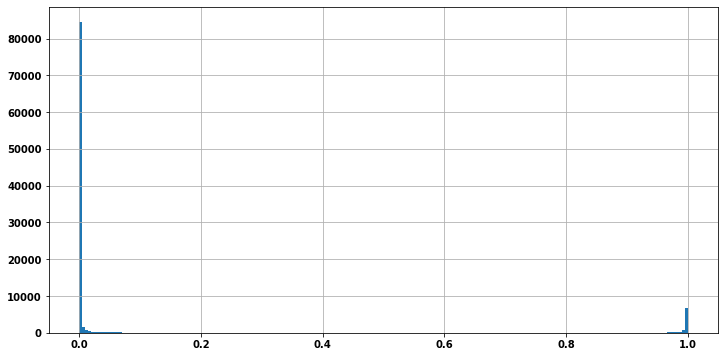

In [27]:
# El histograma de las probabilidades resultantes del modelo 
pd.Series(y_pred_cnn.flatten()).hist(bins=200)

Ahora vamos a crear una nueva red con más capas convolucionales. Intentamos desarrollar un modelo concorde a la estructura representada en este ejemplo: 

![image.png](attachment:image.png)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 36)        14436     
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense (Dense)               (None, 128)               1843328   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,859,470
Trainable params: 1,859,470
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
60/60 [=============================

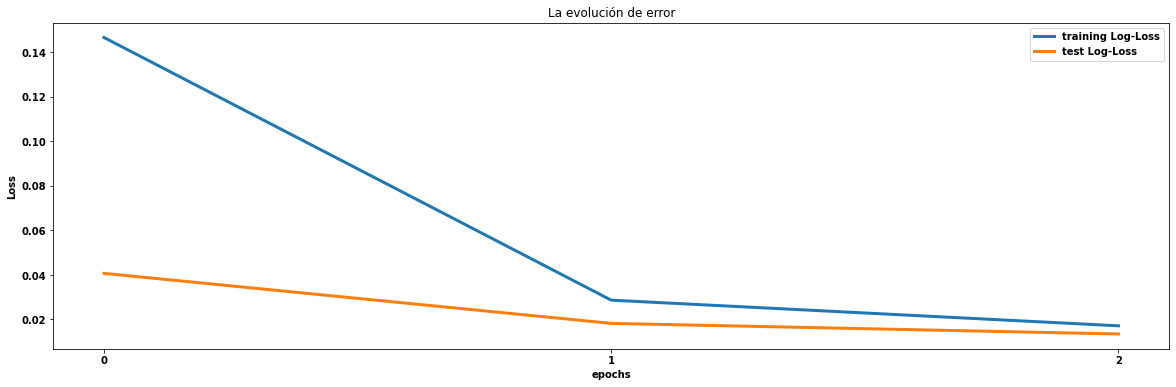

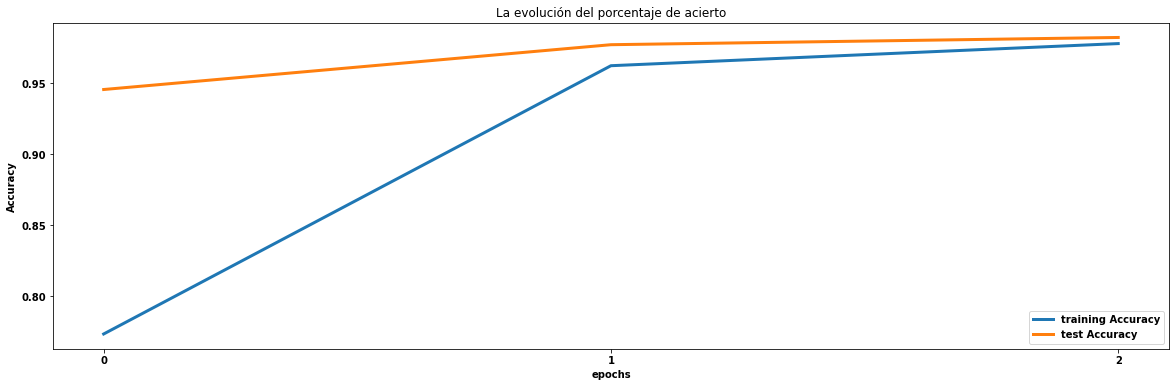

In [28]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 333
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`


# Declarar el modelo que se va a crear
modelo_cnn2 = Sequential()
modelo_cnn2.add(Input(shape=x_train[0].shape))
modelo_cnn2.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo_cnn2.add(Conv2D(filters=36, kernel_size=(5,5), activation='relu'))
modelo_cnn2.add(Flatten())
modelo_cnn2.add(Dense(128, activation='relu'))
modelo_cnn2.add(Dense(10, activation='softmax'))

# Compilar e indicar los ajustes del modelo
modelo_cnn2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Consultar el resumen del modelo definido
modelo_cnn2.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros2 = modelo_cnn2.fit(x_train, y_train_norm, validation_data=(x_test, y_test_norm), epochs=3, batch_size=1000)

# Calcular las predicciones para el conjunto de test 
y_pred_cnn2 = modelo_cnn2.predict(x_test)


# Filtrar las predicciones y evaluar el modelo
y_pred_cnn_filt2 = np.where(y_pred_cnn2 < 0.5, 0, 1)
print('Acuuracy:', accuracy_score(y_test_norm, y_pred_cnn_filt2))
print('AUC:', roc_auc_score(y_test_norm, y_pred_cnn_filt2))

# Graficamos la evolución de error (Logic Loss)
plt.figure(figsize=(20,6))
plt.plot(registros2.epoch, registros2.history['loss'], linewidth=3, label='training Log-Loss')
plt.plot(registros2.epoch, registros2.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.xticks(registros2.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

# Graficamos la evolución del porcentaje de acierto (Accuracy)
plt.figure(figsize=(20,6))
plt.plot(registros2.epoch, registros2.history['accuracy'], linewidth=3, label='training Accuracy')
plt.plot(registros2.epoch, registros2.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.xticks(registros2.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

Como se puede apreciar, los resultados del modelo, tanto en términos de **precisión** como de **evolución de la métrica de error (_Loss_)** en los dos conjuntos de entrenamiento y de prueba, sin duda son **muy acertados**. 

---

### **`Ejercicio 17.1`**

Crea una ___ConvNet___ basada en la estructura recomendada en el siguiente diagrama, considerando los siguientes puntos. Explica si este último modelo tiene un buen rendimiento comparando con modelos anteriores:
- El tamaño de los _kernels_ aplicada en la capa convolucional es de (`3x3`).
- `semilla=333`,
- `epochs=3`,
- `batch_size=1000`,
- `umbral=0.5`

![image.png](attachment:image.png)

In [29]:
# Solución
# Ejercicio 17.1
# Resetear el estado global de keras
def ConvNet():
    clear_session()

    # Fijar la semilla para conseguir la reproducibilidad de los resultados
    semilla = 333
    random.seed(semilla)   # Fijar la semilla a nivel de `python`
    np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
    tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`


    # Declarar el modelo que se va a crear
    modelo_convnet = Sequential()
    modelo_convnet.add(Input(shape=x_train[0].shape))
    modelo_convnet.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))
    modelo_convnet.add(Flatten())
    modelo_convnet.add(Dense(50, activation='relu'))
    modelo_convnet.add(Dense(10, activation='softmax'))

    # Compilar e indicar los ajustes del modelo
    modelo_convnet.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    # Consultar el resumen del modelo definido
    modelo_convnet.summary()

    # Ajustar el modelo a los datos del entrenamiento.
    registros = modelo_convnet.fit(x_train, y_train_norm, validation_data=(x_test, y_test_norm), epochs=3, batch_size=1000)

    # Calcular las predicciones para el conjunto de test 
    y_pred_cnn = modelo_convnet.predict(x_test)


    # Filtrar las predicciones y evaluar el modelo
    y_pred_cnn_filt = np.where(y_pred_cnn < 0.5, 0, 1)
    print('Acuuracy:', accuracy_score(y_test_norm, y_pred_cnn_filt))
    print('AUC:', roc_auc_score(y_test_norm, y_pred_cnn_filt))
    
    # Graficamos la evolución de error (Logic Loss)
    plt.figure(figsize=(20,6))
    plt.plot(registros.epoch, registros.history['loss'], linewidth=3, label='training Log-Loss')
    plt.plot(registros.epoch, registros.history['val_loss'], linewidth=3, label='test Log-Loss')
    plt.xticks(registros.epoch)
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.title('La evolución de error')
    plt.legend(loc = 'upper right')
    plt.show()

    # Graficamos la evolución del porcentaje de acierto (Accuracy)
    plt.figure(figsize=(20,6))
    plt.plot(registros.epoch, registros.history['accuracy'], linewidth=3, label='training Accuracy')
    plt.plot(registros.epoch, registros.history['val_accuracy'], linewidth=3, label='test Accuracy')
    plt.xticks(registros.epoch)
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.title('La evolución del porcentaje de acierto')
    plt.legend(loc = 'lower right')
    plt.show()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 flatten (Flatten)           (None, 6760)              0         
                                                                 
 dense (Dense)               (None, 50)                338050    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
Total params: 338,660
Trainable params: 338,660
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
60/60 [==============================] - 14s 214ms/step - loss: 0.2643 - accuracy: 0.5924 - val_loss: 0.1058 - val_accuracy: 0.8668
Epoch 2/3
60/60 [=======================

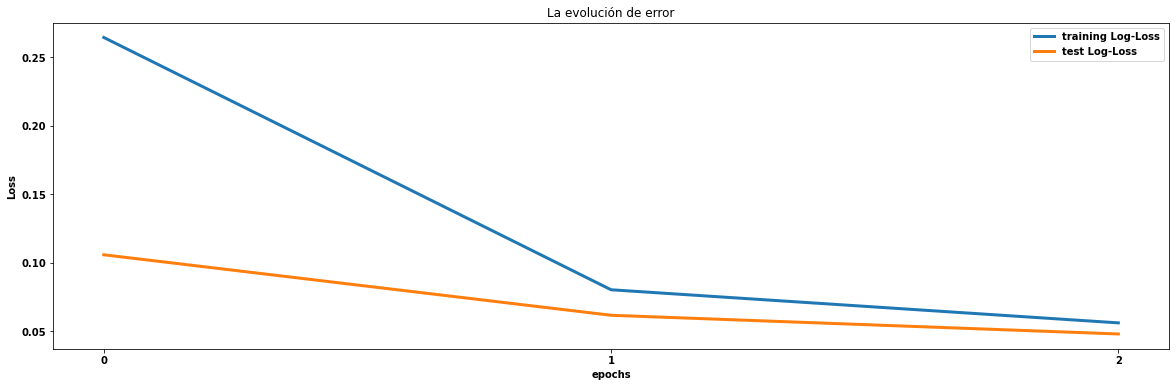

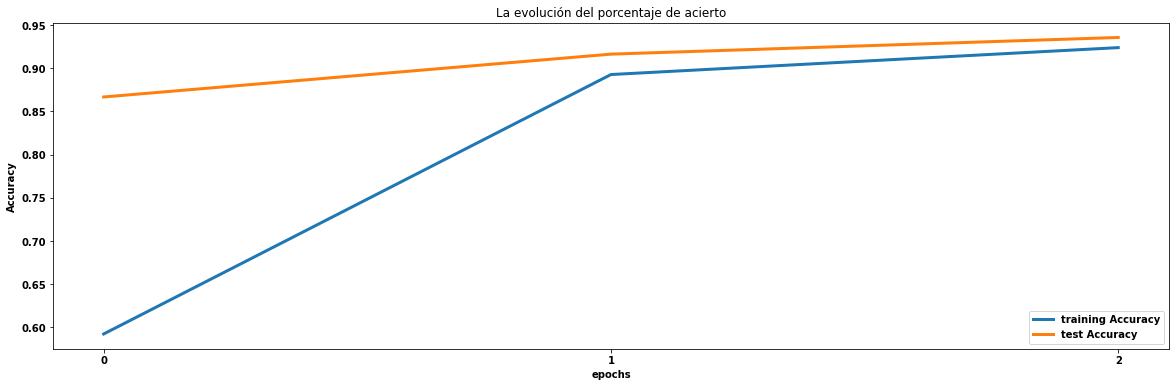

In [30]:
ConvNet()

**Este modelo tendrá peor rendimiento ya que el kernel es de menor tamaño, en este caso es de (3,3) mientras que en los anteriores es de (4,4) o (5,5)**

---

### Reducción de dimensionalidad (___Sub-sampling___)

El último modelo entrenado (`modelo_cnn2`) con dos capas convolucionales y una capa oculta tipo _fully-connected_ ha llegado a tener unos **resultados perfectos**. Sin embargo, el **número de los parámetros** de esta red se podría considerar algo **elevado** (cerca de 2 millones) considerando que todavía no estamos ante una problematica muy complicada.

In [31]:
print("El número total de los parámetros de la red (modelo_cnn): ", modelo_cnn2.count_params())

El número total de los parámetros de la red (modelo_cnn):  1859470


En las capas convolucionales, al mismo tiempo que **se aplican diferentes _kernels_** para sacar varias características representativas y **detectar diferentes patrones** presentes en las imágenes, se suelen aplicar también **una serie de técnicas de reducción de muestreo** tipo ___dawn-sampling___ o ___sub-sampling___ que intentan disminuir el tamaño de las características extraídas.  

Mantener el tamaño de la imagen al pasar por los filtros de convolución hace que el **proceso de aprendizaje sea muy costoso por el número de neuronas y los pesos** asociados a los parémetros de la red neuronal. Para ello existen unas **capas llamadas ___Pooling___** que permiten reducir esos pesos del modelo y así agilizar el proceso de aprendizaje.

![max-pp2.gif](attachment:max-pp2.gif)



El método más usado en las capas de _Pooling_ se llama ___Max-Pooling___ que procura **mantener las características más importantes** que detecta cada filtro, **preservando el valor más alto** en una ventana (de 2x2 por ejemplo) y reduciendo a su vez el tamaño de las matrices de _feature mapping_.



![max-p.gif](attachment:max-p.gif)

Ahora vamos a **incluir unas capas de tipo _Max-Pooling_** en nuestra red neuronal convolucional según la estructura representada en la siguiente gráfica.

![image.png](attachment:image.png)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 36)          14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

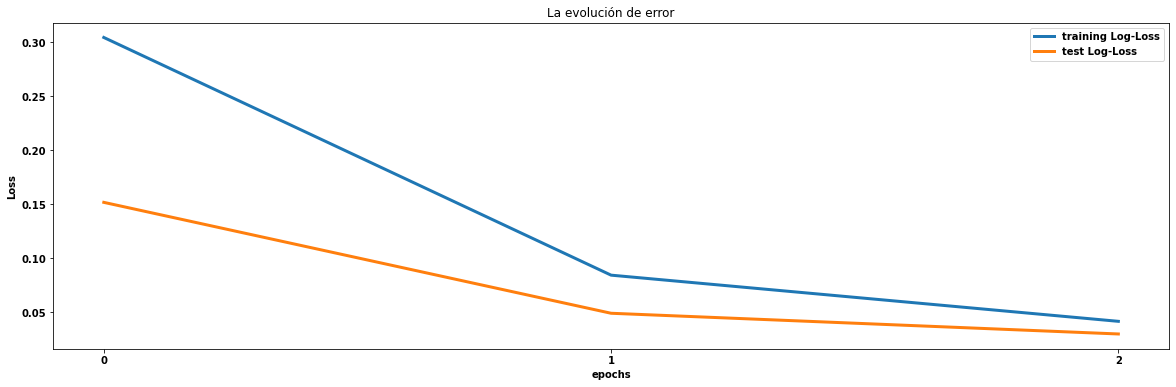

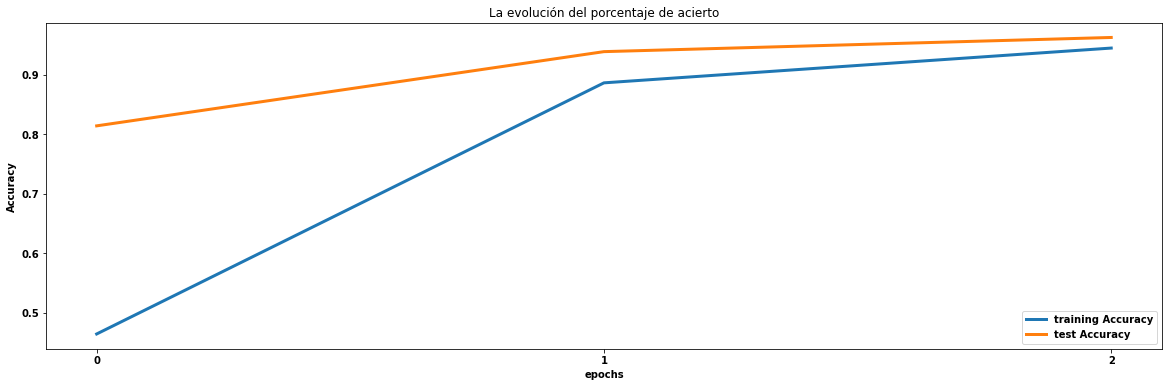

In [32]:
# importar los módulos, las clases y las funciones a utilizar
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from keras.backend import clear_session

# Resetear el estado global de keras
clear_session()

# Fijar la semilla para conseguir la reproducibilidad de los resultados
semilla = 333
random.seed(semilla)   # Fijar la semilla a nivel de `python`
np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`


# Declarar el modelo que se va a crear
modelo_cnn_pool = Sequential()
modelo_cnn_pool.add(Input(shape=x_train[0].shape))
modelo_cnn_pool.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo_cnn_pool.add(MaxPooling2D(pool_size=(2,2)))
modelo_cnn_pool.add(Conv2D(filters=36, kernel_size=(5,5), activation='relu'))
modelo_cnn_pool.add(MaxPooling2D(pool_size=(2,2)))
modelo_cnn_pool.add(Flatten())
modelo_cnn_pool.add(Dense(128, activation='relu'))
modelo_cnn_pool.add(Dense(10, activation='softmax'))

# Compilar e indicar los ajustes del modelo
modelo_cnn_pool.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Consultar el resumen del modelo definido
modelo_cnn_pool.summary()

# Ajustar el modelo a los datos del entrenamiento.
registros_pool = modelo_cnn_pool.fit(x_train, y_train_norm, validation_data=(x_test, y_test_norm), epochs=3, batch_size=1000)

# Calcular las predicciones para el conjunto de test 
y_pred_cnn_pool = modelo_cnn_pool.predict(x_test)


# Filtrar las predicciones y evaluar el modelo
y_pred_cnn_filt_pool = np.where(y_pred_cnn_pool < 0.5, 0, 1)
print('Acuuracy:', accuracy_score(y_test_norm, y_pred_cnn_filt_pool))
print('AUC:', roc_auc_score(y_test_norm, y_pred_cnn_filt_pool))

# Graficamos la evolución de error (Logic Loss)
plt.figure(figsize=(20,6))
plt.plot(registros_pool.epoch, registros_pool.history['loss'], linewidth=3, label='training Log-Loss')
plt.plot(registros_pool.epoch, registros_pool.history['val_loss'], linewidth=3, label='test Log-Loss')
plt.xticks(registros_pool.epoch)
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.title('La evolución de error')
plt.legend(loc = 'upper right')
plt.show()

# Graficamos la evolución del porcentaje de acierto (Accuracy)
plt.figure(figsize=(20,6))
plt.plot(registros_pool.epoch, registros_pool.history['accuracy'], linewidth=3, label='training Accuracy')
plt.plot(registros_pool.epoch, registros_pool.history['val_accuracy'], linewidth=3, label='test Accuracy')
plt.xticks(registros_pool.epoch)
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('La evolución del porcentaje de acierto')
plt.legend(loc = 'lower right')
plt.show()

Podemos observar que el modelo resultante con dos capas de _Max-Pooling_ tiene unos resultados muy aceptables, a pesar de tener un número menor de parámetros.

In [33]:
print("El número total de los parámetros de la red (modelo_dnn): ", modelo_dnn.count_params())
print("El número total de los parámetros de la red (modelo_cnn): ", modelo_cnn.count_params())
print("El número total de los parámetros de la red (modelo_cnn2): ", modelo_cnn2.count_params())
print("El número total de los parámetros de la red (modelo_cnn_pool): ", modelo_cnn_pool.count_params())

print("El modelo con Max-Pooling es %.1f veces más pequeño que el último modelo" % (modelo_cnn2.count_params()/modelo_cnn_pool.count_params()) )

El número total de los parámetros de la red (modelo_dnn):  119810
El número total de los parámetros de la red (modelo_cnn):  313230
El número total de los parámetros de la red (modelo_cnn2):  1859470
El número total de los parámetros de la red (modelo_cnn_pool):  89998
El modelo con Max-Pooling es 20.7 veces más pequeño que el último modelo


---

### **`Ejercicio 17.2`**

Saca la gráfica del **Learning Curve** con la estructura del último modelo analizado en la sesión (`modelo_cnn_pool`), definiendo y aplicando una función nueva considerando los siguientes puntos. Analiza y compara los resultados entre diferentes curvas y explica el modelo que se puede elegir como mejor clasificador:
- La función toma solamente una entrada para el hiperparámetro `epochs`con `1` como el valor por defecto. Dibuja diferentes curvas para distintos números de iteraciones (_`epochs`_: `{1, 2, 3}`)
- La curva muestra la evolución de `Accuracy` tanto para el conjunto de _training_ como para el dataset de _test_
- `semilla=333`,
- `batch_size=1000`,
- `umbral=0.5`
- (*Sugerencia*: No incluyas más de `5` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)

In [34]:
# Solución
# Ejercicio 17.2
def generate_learning_curve(epoch:int=1):
    import random
    import tensorflow as tf
    from keras.models import Sequential
    from keras import Input
    from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
    from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
    from keras.backend import clear_session

    # Resetear el estado global de keras
    clear_session()

    # Fijar la semilla para conseguir la reproducibilidad de los resultados
    semilla = 333
    random.seed(semilla)   # Fijar la semilla a nivel de `python`
    np.random.seed(semilla)  # Fijar la semilla a nivel de `numpy`  
    tf.random.set_seed(semilla)  # Fijar la semilla a nivel de `tensorflow`
    # Declarar el modelo que se va a crear
    
    modelo_cnn_pool = Sequential()
    modelo_cnn_pool.add(Input(shape=x_train[0].shape))
    modelo_cnn_pool.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
    modelo_cnn_pool.add(MaxPooling2D(pool_size=(2,2)))
    modelo_cnn_pool.add(Conv2D(filters=36, kernel_size=(5,5), activation='relu'))
    modelo_cnn_pool.add(MaxPooling2D(pool_size=(2,2)))
    modelo_cnn_pool.add(Flatten())
    modelo_cnn_pool.add(Dense(128, activation='relu'))
    modelo_cnn_pool.add(Dense(10, activation='softmax'))

    # Compilar e indicar los ajustes del modelo
    modelo_cnn_pool.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    # Consultar el resumen del modelo definido
    modelo_cnn_pool.summary()

    # Ajustar el modelo a los datos del entrenamiento.
    registros_pool = modelo_cnn_pool.fit(x_train, y_train_norm, validation_data=(x_test, y_test_norm), epochs=epoch, batch_size=1000)

    # Calcular las predicciones para el conjunto de test 
    y_pred_cnn_pool = modelo_cnn_pool.predict(x_test)
    

    # Filtrar las predicciones y evaluar el modelo
    y_pred_cnn_filt_pool = np.where(y_pred_cnn_pool < 0.5, 0, 1)
    print('Acuracy is:', accuracy_score(y_test_norm, y_pred_cnn_filt_pool))
    print('AUC:', roc_auc_score(y_test_norm, y_pred_cnn_filt_pool))
    
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,x_train.shape[0],5).astype(int)
    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)
    
    
    for i in range(num_samples.size):
        registros_pool = modelo_cnn_pool.fit(x_train[:num_samples[i]], y_train_norm[:num_samples[i]], validation_data=(x_test, y_test_norm), epochs=epoch, batch_size=1000)
        # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
        y_pred_cnn_pool = modelo_cnn_pool.predict(x_test)

        # Filtrar las predicciones y evaluar el modelo
        y_pred_cnn_filt_pool = np.where(y_pred_cnn_pool < 0.5, 0, 1)
        
        train_score[i] = registros_pool.history['accuracy'][0]
        test_score[i] = accuracy_score(y_test_norm, y_pred_cnn_filt_pool)

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    # Graficamos el rendimiento de training versus de test
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.title('Curva de aprendizaje (Learning Curve) para el modelo_svc')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')  

    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 36)          14436     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 36)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

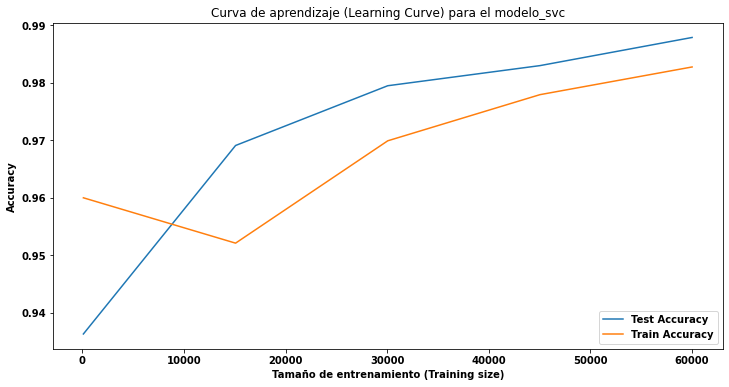

In [35]:
generate_learning_curve(3)